In [46]:
import sklearn
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# 2 LDA-Derivation from the Least Squares Error (24 points)

# 3 Data Generation with QDA (8 points)

In [47]:
# from solution sheet of exercise 2:
def fit_qda(training_features, training_labels):
    """
    This function compute for each class: mean, covariance matrix and priors
    
    input training_features: N_training x 2 numpy array 
    input training_labels: N_training x 1 numpy array
    output: mu: N_labels x 2
    output: cov: N_labels x 2 x 2
    output: p: N_labels x 1
    """ 
    mu, cov, p = [], [], []
    for label in np.unique(training_labels):
        # filtering the correct class
        data = training_features[training_labels == label]
        
        # mean
        mean = np.mean(data, axis=0)
        mu.append(mean)
        
        # Covariance 
        # Computed as in textbook
        # data_centered = data - mean
        # cov.append(np.dot(data_centered.T, data_centered)/data.shape[0])
        
        # as numpy oneliner
        cov.append(np.cov(data.T))
        
        # Prior
        p.append(data.shape[0]/training_features.shape[0])
        
    return mu, cov, p

In [48]:
# load data
digits = load_digits()
print ( digits.keys())

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [49]:
# only use 1 and 5
ind = np.where(np.logical_or(target==1, target == 5))
x_train = data[ind]
y_train = target[ind]

In [50]:
# fit model
mu,cov,p = fit_qda(x_train,y_train)

In [77]:
# generate new data
x1_gen = np.random.multivariate_normal(mu[0],cov[0],8).reshape([8,8,8])
x5_gen = np.random.multivariate_normal(mu[1],cov[1],8).reshape([8,8,8])

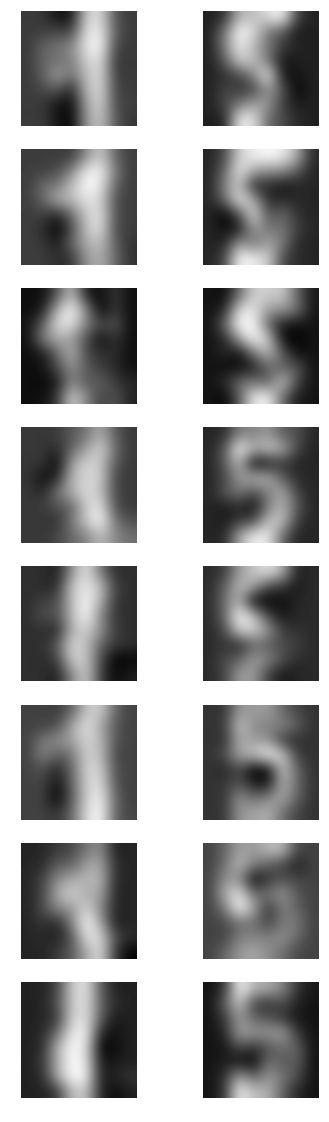

In [78]:
# plot results
fig = plt.figure(figsize=(6,20))
gs = mpl.gridspec.GridSpec(8, 2)

for i in range(8):
    plt.subplot(gs[i,0])
    plt.gray()
    plt.imshow(x1_gen[i] , interpolation ="bicubic")
    plt.axis('off')
    
    plt.subplot(gs[i,1])
    plt.gray()
    plt.imshow(x5_gen[i] , interpolation ="bicubic")
    plt.axis('off')

The method does not incorporate the correlations between neighboring pixels. This can lead to blurred images or unexpected pixelvalues, for example in for of an uncontinued line.